# Life Expectancy Data Analysis (1990-2021)

#### This project aims to analyze the life expectancy by country from 1990 to 2021

Importing Required Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

Loading in the dataset

In [3]:
life_expectancy_data = pd.read_csv("data/Life_Expectancy_at_Birth.csv")
life_expectancy_data.head()

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Life Expectancy at Birth (1990),Life Expectancy at Birth (1991),Life Expectancy at Birth (1992),...,Life Expectancy at Birth (2012),Life Expectancy at Birth (2013),Life Expectancy at Birth (2014),Life Expectancy at Birth (2015),Life Expectancy at Birth (2016),Life Expectancy at Birth (2017),Life Expectancy at Birth (2018),Life Expectancy at Birth (2019),Life Expectancy at Birth (2020),Life Expectancy at Birth (2021)
0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,SA,180.0,45.9672,46.6631,47.5955,...,61.9230,62.4167,62.5451,62.6587,63.1361,63.0160,63.0810,63.5645,62.5751,61.9824
1,AGO,Angola,Africa,Southern Hemisphere,Medium,SSA,148.0,41.8933,43.8127,42.2088,...,58.6231,59.3074,60.0397,60.6546,61.0923,61.6798,62.1438,62.4484,62.2612,61.6434
2,ALB,Albania,Europe,Northern Hemisphere,High,ECA,67.0,73.1439,73.3776,73.7148,...,78.0640,78.1226,78.4075,78.6441,78.8602,79.0473,79.1838,79.2825,76.9893,76.4626
3,AND,Andorra,Europe,Northern Hemisphere,Very High,NaN,40.0,78.4063,77.9805,80.3241,...,82.9166,82.9343,82.9483,82.9534,82.9671,82.9803,82.9923,83.0039,79.0234,80.3684
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,Very High,AS,26.0,71.9004,72.2414,72.3062,...,78.7155,78.8528,79.0442,79.2232,79.3347,79.5036,79.6274,79.7262,78.9457,78.7104


The average life expectancy across all countries in 2021

##### The overall development of countries in the world

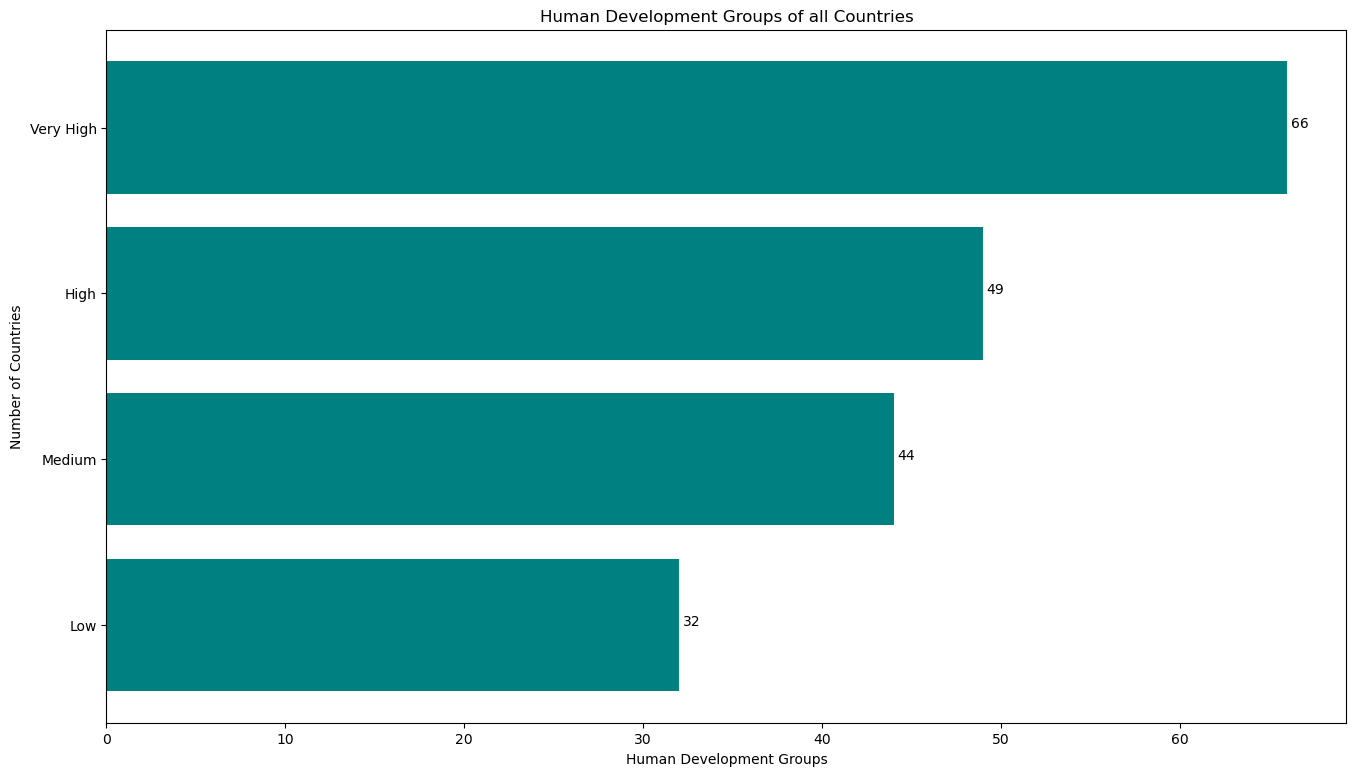

In [4]:
development_plot = life_expectancy_data["Human Development Groups"]
dev_count = [0, 0, 0, 0]
column_e = ["Low", "Medium", "High", "Very High"]
for i in development_plot:
    try:
        dev_count[column_e.index(i)] += 1
    except ValueError:
        pass
    
    

fig, ax = plt.subplots(figsize = (16,9))
plt.barh(column_e,dev_count, color = "teal")
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.4,str(round((i.get_width()),2)))
plt.xlabel("Human Development Groups")
plt.ylabel("Number of Countries")
plt.title("Human Development Groups of all Countries")
plt.show()

## Line Graph of the Average Life Expectancy in the World from 1990-2021

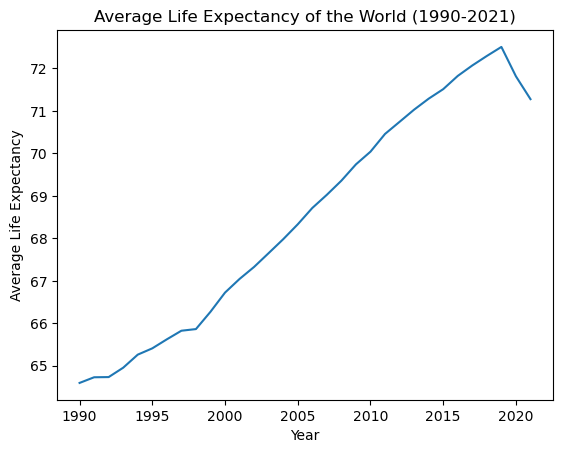

In [5]:
l = []
for i in range(1990, 2022):
    life_country = life_expectancy_data[["Country", f"Life Expectancy at Birth ({i})"]]
    average = np.mean(life_country[f"Life Expectancy at Birth ({i})"])
    l.append(average)
plt.plot(range(1990, 2022),l)
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy")
plt.title("Average Life Expectancy of the World (1990-2021)")
plt.show()

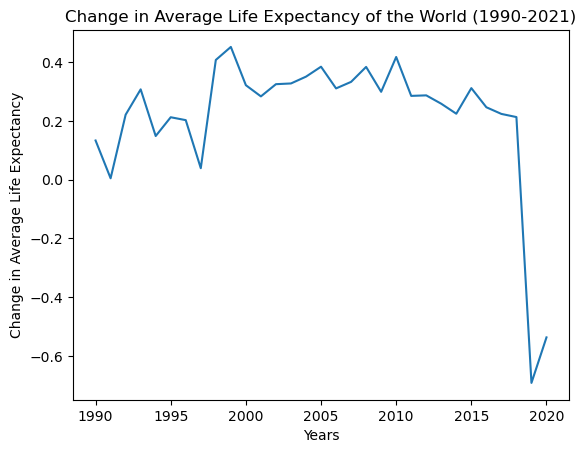

In [6]:
j = []
for i in range(len(l)-1):
    j.append(l[i+1]-l[i])
plt.plot(range(1990, 2021),j)
plt.xlabel("Years")
plt.ylabel("Change in Average Life Expectancy")
plt.title("Change in Average Life Expectancy of the World (1990-2021)")
plt.show()

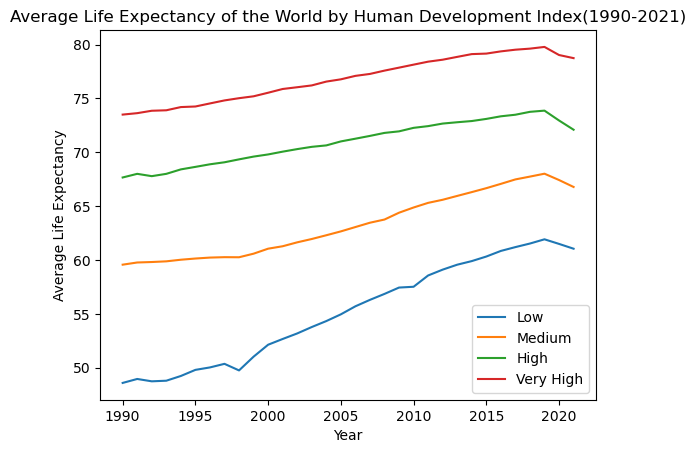

In [8]:
low = []
medi = []
high = []
vhigh = []
for i in range(1990, 2022):
    life_country = life_expectancy_data.loc[life_expectancy_data["Human Development Groups"] == "Low"][["Country", f"Life Expectancy at Birth ({i})"]]
    average = np.mean(life_country[f"Life Expectancy at Birth ({i})"])
    low.append(average)
    
    life_country = life_expectancy_data.loc[life_expectancy_data["Human Development Groups"] == "Medium"][["Country", f"Life Expectancy at Birth ({i})"]]
    average = np.mean(life_country[f"Life Expectancy at Birth ({i})"])
    medi.append(average)
    
    life_country = life_expectancy_data.loc[life_expectancy_data["Human Development Groups"] == "High"][["Country", f"Life Expectancy at Birth ({i})"]]
    average = np.mean(life_country[f"Life Expectancy at Birth ({i})"])
    high.append(average)

    life_country = life_expectancy_data.loc[life_expectancy_data["Human Development Groups"] == "Very High"][["Country", f"Life Expectancy at Birth ({i})"]]
    average = np.mean(life_country[f"Life Expectancy at Birth ({i})"])
    vhigh.append(average)

plt.plot(range(1990, 2022),low)
plt.plot(range(1990, 2022),medi)
plt.plot(range(1990, 2022),high)
plt.plot(range(1990, 2022),vhigh)
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy")
plt.legend(["Low", "Medium", "High", "Very High"])
plt.title("Average Life Expectancy of the World by Human Development Index(1990-2021)")
plt.show()


In [20]:
model = LinearRegression()
model.fit(np.array(range(1990, 2022)).reshape(-1,1),low)
print(model.intercept_)
print(model.coef_)
xy=[]
for i in range(10):
    xy.append(i*model.coef_+model.intercept_)
xy

-939.7427637898653
[0.49609557]


[array([-939.74276379]),
 array([-939.24666822]),
 array([-938.75057264]),
 array([-938.25447707]),
 array([-937.75838149]),
 array([-937.26228592]),
 array([-936.76619034]),
 array([-936.27009477]),
 array([-935.77399919]),
 array([-935.27790362])]